# 8. CHICAGO AIRBNB FEATURE ENGINEERING
---

## 1. The Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

chicago = pd.read_csv('data/chicago_airbnb2')

num_cols = ['host_rr', 'host_ar', 'latitude', 'longitude', 'accommodates',
            'baths', 'bedrooms', 'beds', 'min_nights', 'max_nights', 'n_reviews', 
            'rs_rating', 'rs_accuracy', 'rs_cleanliness', 'rs_check_in', 
            'rs_communication', 'rs_location', 'rs_value', 'reviews_per_month']

cat_cols = ['host_rt', 'superhost', 'neighborhood', 'property_type', 'room_type', 
            'instant_bookable']

chicago = chicago.drop('amenities', axis=1)

train, test = train_test_split(chicago, test_size=0.2, random_state=42)

X_train = train.drop('price', axis=1)
y_train = train['price']

X_test = test.drop('price', axis=1)
y_test = test['price']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5240, 25), (5240,), (1310, 25), (1310,))

## 2. New Numerical Attributes via Custom Transformation

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttributeAdder(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df_ = df.copy()
        df_['beds_per_bdrm'] = df_['beds']/df_['bedrooms']
        df_['baths_per_bed'] = df_['baths']/df_['beds']
        df_.replace(np.inf, 0, inplace=True)
        df_.replace(np.nan, 0, inplace=True)
        return df_
    
adder = AttributeAdder()
X_train_num = adder.fit_transform(train[num_cols])
print(X_train_num.shape)
X_train_num.head()

(5240, 21)


,host_rr,host_ar,latitude,longitude,accommodates,baths,bedrooms,beds,min_nights,max_nights,n_reviews,rs_rating,rs_accuracy,rs_cleanliness,rs_check_in,rs_communication,rs_location,rs_value,reviews_per_month,beds_per_bdrm,baths_per_bed
3692,100.0,100.0,41.956,-87.666,8,1.00,4.0,4.0,1.0,120.0,82,98.0,10.0,9.0,9.0,9.0,10.0,9.0,4.70,1.0,0.250
1553,100.0,98.0,41.919,-87.690,6,1.00,2.0,3.0,2.0,1125.0,218,98.0,10.0,10.0,10.0,10.0,10.0,10.0,5.16,1.5,0.333
4338,100.0,100.0,41.950,-87.762,2,1.00,1.0,1.0,1.0,30.0,24,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.87,1.0,1.000
107,100.0,94.0,42.004,-87.667,2,0.75,1.0,2.0,2.0,90.0,233,98.0,10.0,10.0,10.0,10.0,10.0,10.0,2.59,2.0,0.375
29,100.0,86.0,41.688,-87.609,3,1.00,1.0,1.0,1.0,365.0,269,98.0,10.0,10.0,10.0,10.0,10.0,10.0,2.46,1.0,1.000


In [3]:
num_cols = X_train_num.columns
num_cols

Index(['host_rr', 'host_ar', 'latitude', 'longitude', 'accommodates', 'baths',
       'bedrooms', 'beds', 'min_nights', 'max_nights', 'n_reviews',
       'rs_rating', 'rs_accuracy', 'rs_cleanliness', 'rs_check_in',
       'rs_communication', 'rs_location', 'rs_value', 'reviews_per_month',
       'beds_per_bdrm', 'baths_per_bed'],
      dtype='object')

## 3. Scaling Numerical Attributes
### i. Before scaling:

In [4]:
X_train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
host_rr,5240.0,94.884,15.729,0.000,100.000,100.000,100.000,100.000
host_ar,5240.0,88.970,18.768,0.000,87.000,97.000,100.000,100.000
latitude,5240.0,41.898,0.059,41.647,41.873,41.902,41.939,42.022
longitude,5240.0,-87.663,0.043,-87.845,-87.687,-87.660,-87.632,-87.538
accommodates,5240.0,4.153,2.841,0.000,2.000,4.000,6.000,16.000
baths,5240.0,1.248,0.774,0.000,1.000,1.000,1.500,11.000
bedrooms,5240.0,1.711,1.048,1.000,1.000,1.000,2.000,12.000
beds,5240.0,2.125,1.788,0.000,1.000,2.000,3.000,30.000
min_nights,5240.0,6.888,11.860,1.000,1.000,2.000,3.000,60.000
max_nights,5240.0,687.294,512.330,1.000,40.000,1125.000,1125.000,1125.000


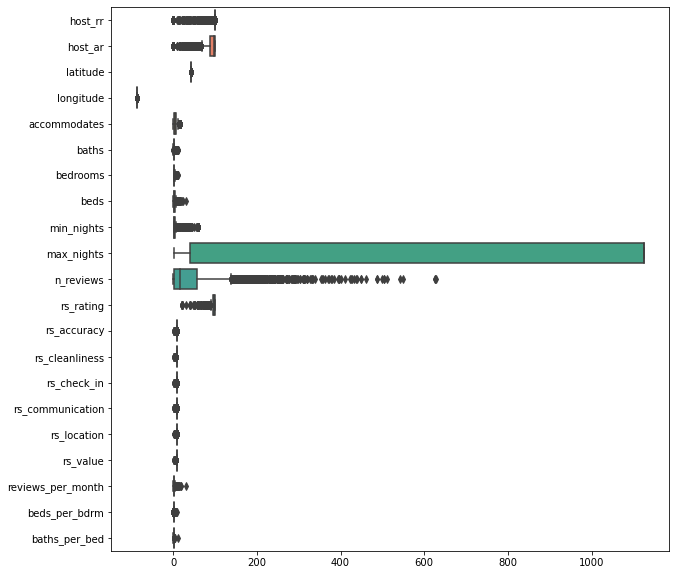

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=X_train_num, orient="h", palette="husl")

### ii. After Standardization:
We chose `StandardScaler` because it is less sensitive from outliers which we have in at least 3 columns (min_nights, max_nights, and n_reviews). I we didn't have outliers, we probably would have used `MinMaxScaler`.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled, 
                             columns=num_cols)
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
host_rr,5240.0,-3.558e-16,1.0,-6.033,0.325,0.325,0.325,0.325
host_ar,5240.0,-3.865e-17,1.0,-4.741,-0.105,0.428,0.588,0.588
latitude,5240.0,5.522e-14,1.0,-4.260,-0.424,0.055,0.690,2.095
longitude,5240.0,-4.846e-14,1.0,-4.274,-0.551,0.086,0.721,2.942
accommodates,5240.0,2.089e-16,1.0,-1.462,-0.758,-0.054,0.650,4.170
baths,5240.0,-3.435e-16,1.0,-1.612,-0.320,-0.320,0.326,12.599
bedrooms,5240.0,9.667e-16,1.0,-0.679,-0.679,-0.679,0.275,9.817
beds,5240.0,7.242e-16,1.0,-1.189,-0.629,-0.070,0.489,15.590
min_nights,5240.0,3.301e-16,1.0,-0.497,-0.497,-0.412,-0.328,4.479
max_nights,5240.0,3.648e-16,1.0,-1.340,-1.264,0.854,0.854,0.854


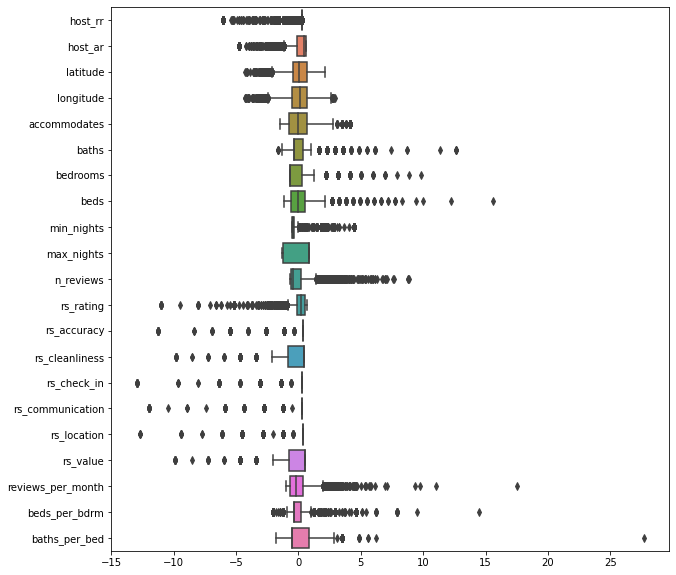

In [7]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=X_train_scaled, orient="h", palette="husl")

### iii. After Normalization:
Standadization doesn't seem that our data is scaled well. Let's try normalization and see the effect

In [8]:
from sklearn.preprocessing import MinMaxScaler

normer = MinMaxScaler()
X_train_normed = normer.fit_transform(X_train_num)
X_train_normed = pd.DataFrame(X_train_normed, 
                             columns=num_cols)
X_train_normed.describe().T

,count,mean,std,min,25%,50%,75%,max
host_rr,5240.0,0.949,0.157,0.0,1.000,1.000,1.000,1.0
host_ar,5240.0,0.890,0.188,0.0,0.870,0.970,1.000,1.0
latitude,5240.0,0.670,0.157,0.0,0.604,0.679,0.779,1.0
longitude,5240.0,0.592,0.139,0.0,0.516,0.604,0.692,1.0
accommodates,5240.0,0.260,0.178,0.0,0.125,0.250,0.375,1.0
baths,5240.0,0.113,0.070,0.0,0.091,0.091,0.136,1.0
bedrooms,5240.0,0.065,0.095,0.0,0.000,0.000,0.091,1.0
beds,5240.0,0.071,0.060,0.0,0.033,0.067,0.100,1.0
min_nights,5240.0,0.100,0.201,0.0,0.000,0.017,0.034,1.0
max_nights,5240.0,0.611,0.456,0.0,0.035,1.000,1.000,1.0


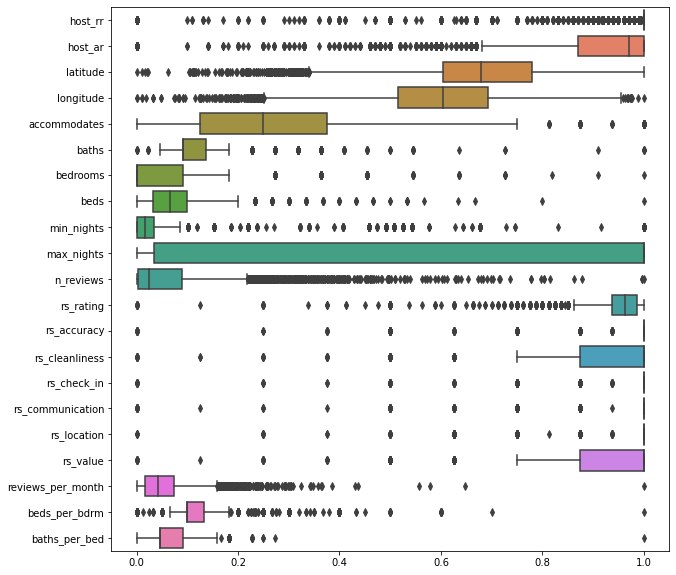

In [9]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=X_train_normed, orient="h", palette="husl")

Normalization doesn't really look that much better than standardization, maybe we should have dealt with outliers better. We will use standardization during model training and see what we get. Maybe after narrowing our features to the best ones, we can go back and work on outliers and retrain the model and see if there are any improvements. 

For now, let's work on categorical attributes

## 4. Looking into Categorical Columns

In [10]:
X_train_cat = train[cat_cols]
X_train_cat.head()

,host_rt,superhost,neighborhood,property_type,room_type,instant_bookable
3692,1H,1,Lake View,apartment,Entire place,0
1553,3H,1,Logan Square,house,Entire place,1
4338,Missing,1,Portage Park,apartment,Entire place,1
107,3H,1,Rogers Park,house,Private room,0
29,3H,1,Pullman,apartment,Entire place,0


In [11]:
X_train_cat.nunique()

host_rt              5
superhost            2
neighborhood        76
property_type        9
room_type            4
instant_bookable     2
dtype: int64

Text(0.5, 1.0, 'Number of unique categories')

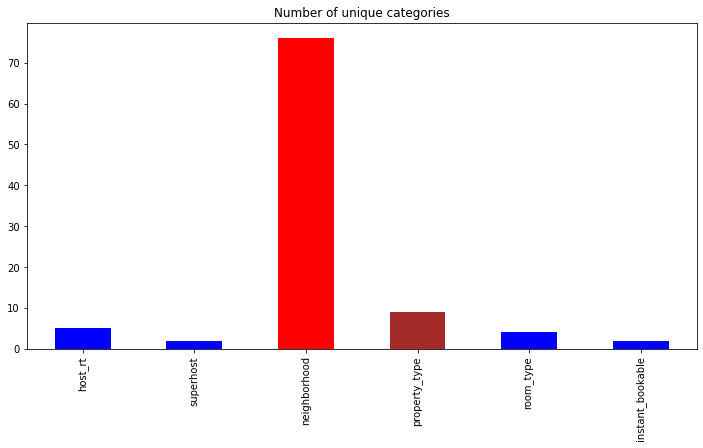

In [12]:
colors = ['blue', 'blue', 'red', 'brown', 'blue', 'blue']
X_train_cat.nunique().plot.bar(figsize=(12,6),
                              color=colors)
plt.title('Number of unique categories')

It looks like there are too many categories in `neighborhood`, and possibly `property_type`, that we need to look into. We may want to combine minor categories. 

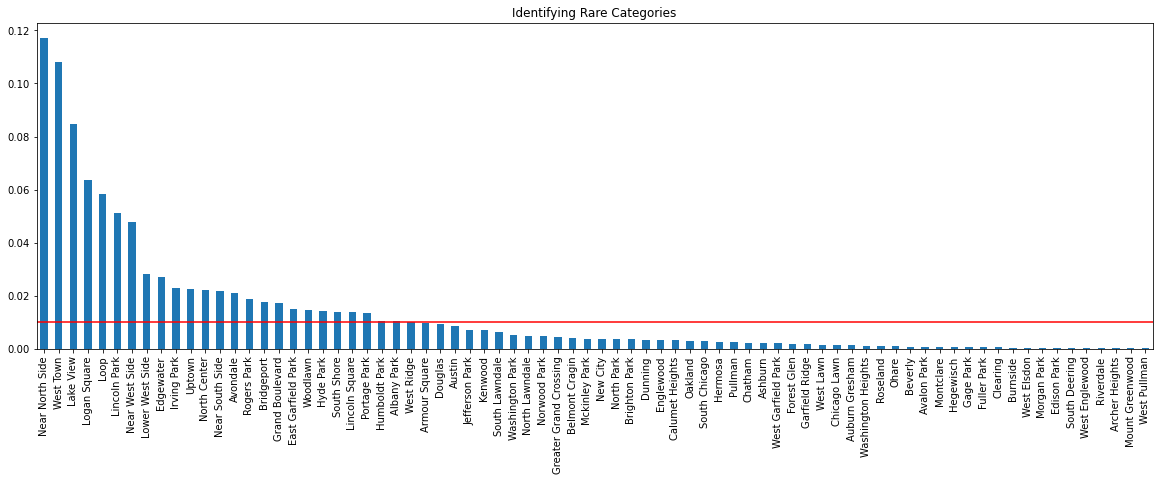

In [13]:
neibhd_freq = X_train_cat['neighborhood'].value_counts() / len(X_train_cat)
fig = neibhd_freq.sort_values(ascending=False).plot.bar(figsize=(20,6))
fig.axhline(y=0.01, color='red')
fig.set_title('Identifying Rare Categories')
plt.show()

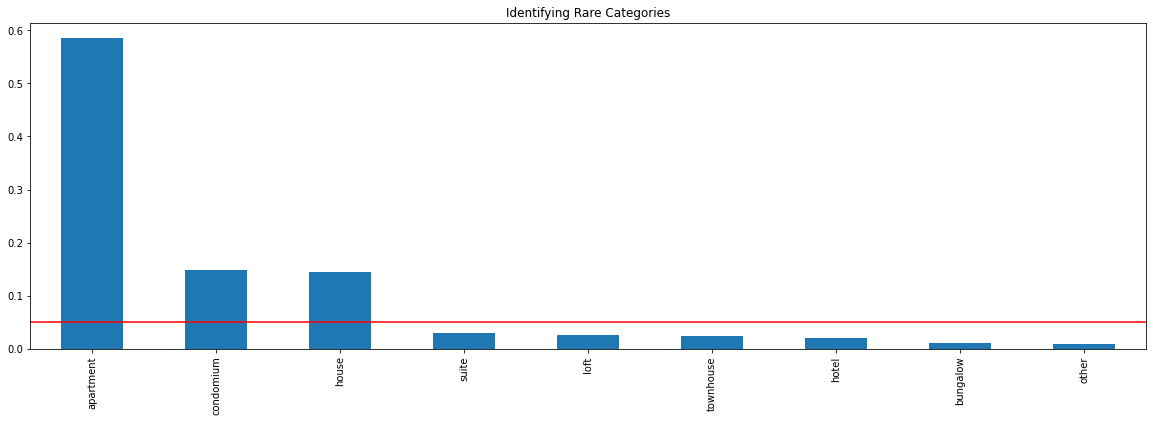

In [14]:
prpty_freq = X_train_cat['property_type'].value_counts() / len(X_train_cat)
fig = prpty_freq.sort_values(ascending=False).plot.bar(figsize=(20,6))
fig.axhline(y=0.05, color='red')
fig.set_title('Identifying Rare Categories')
plt.show()

It's hard to decide on combining categories knowing that if we do we will lose some information on what actually makes the combined categories different. For example, combining `suite` with `bungalow` might acctually hurt our model. Same with neighborhoods. Instead, we can do one hot encoding and then we can narrow down our features to more important one.

## 5. Encoding: Getting Dummies

In [15]:
def make_dummies(df, column):
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop([column], axis=1)
    return df
dummy_cols = ['host_rt', 'neighborhood', 'property_type', 'room_type']
for col in dummy_cols:
    X_train = make_dummies(X_train, col)
    
print(X_train.shape)
X_train.head()

(5240, 115)


,host_rr,host_ar,superhost,latitude,longitude,accommodates,baths,bedrooms,beds,min_nights,max_nights,n_reviews,rs_rating,rs_accuracy,rs_cleanliness,rs_check_in,rs_communication,rs_location,rs_value,instant_bookable,reviews_per_month,host_rt_1H,host_rt_24H,host_rt_3H,host_rt_72H,host_rt_Missing,neighborhood_Albany Park,neighborhood_Archer Heights,neighborhood_Armour Square,neighborhood_Ashburn,neighborhood_Auburn Gresham,neighborhood_Austin,neighborhood_Avalon Park,neighborhood_Avondale,neighborhood_Belmont Cragin,neighborhood_Beverly,neighborhood_Bridgeport,neighborhood_Brighton Park,neighborhood_Burnside,neighborhood_Calumet Heights,neighborhood_Chatham,neighborhood_Chicago Lawn,neighborhood_Clearing,neighborhood_Douglas,neighborhood_Dunning,neighborhood_East Garfield Park,neighborhood_Edgewater,neighborhood_Edison Park,neighborhood_Englewood,...,neighborhood_Loop,neighborhood_Lower West Side,neighborhood_Mckinley Park,neighborhood_Montclare,neighborhood_Morgan Park,neighborhood_Mount Greenwood,neighborhood_Near North Side,neighborhood_Near South Side,neighborhood_Near West Side,neighborhood_New City,neighborhood_North Center,neighborhood_North Lawndale,neighborhood_North Park,neighborhood_Norwood Park,neighborhood_Oakland,neighborhood_Ohare,neighborhood_Portage Park,neighborhood_Pullman,neighborhood_Riverdale,neighborhood_Rogers Park,neighborhood_Roseland,neighborhood_South Chicago,neighborhood_South Deering,neighborhood_South Lawndale,neighborhood_South Shore,neighborhood_Uptown,neighborhood_Washington Heights,neighborhood_Washington Park,neighborhood_West Elsdon,neighborhood_West Englewood,neighborhood_West Garfield Park,neighborhood_West Lawn,neighborhood_West Pullman,neighborhood_West Ridge,neighborhood_West Town,neighborhood_Woodlawn,property_type_apartment,property_type_bungalow,property_type_condomium,property_type_hotel,property_type_house,property_type_loft,property_type_other,property_type_suite,property_type_townhouse,room_type_Entire place,room_type_Hotel room,room_type_Private room,room_type_Shared room
3692,100.0,100.0,1,41.956,-87.666,8,1.00,4.0,4.0,1.0,120.0,82,98.0,10.0,9.0,9.0,9.0,10.0,9.0,0,4.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1553,100.0,98.0,1,41.919,-87.690,6,1.00,2.0,3.0,2.0,1125.0,218,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,5.16,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4338,100.0,100.0,1,41.950,-87.762,2,1.00,1.0,1.0,1.0,30.0,24,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.87,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
107,100.0,94.0,1,42.004,-87.667,2,0.75,1.0,2.0,2.0,90.0,233,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2.59,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
29,100.0,86.0,1,41.688,-87.609,3,1.00,1.0,1.0,1.0,365.0,269,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2.46,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


That's 115 columns. 

We used `get_dummies` here because we wanted to see the column it return. For model training, we will use `OneHotEncoding` which doesn't return dataframes but instead returns a numpy array. It also doesn't give us column names, which we won't need though. 